# Análisis de Ventas del Supermercado de Don Francisco

## Ejercicio 3 - Trabajo Práctico de Probabilidad y Estadística

### **Contexto del Problema**

Don Francisco es un pequeño comerciante de barrio que posee un supermercado, con el que sostiene su familia. Uno de sus hijos, Matías, quien recién inicia a cursar la Especialización en Inteligencia Artificial del LSE de la UBA, le propone hacer un análisis de las ventas durante el año anterior, con el fin de hacer pronósticos para el año siguiente, lo que a don Francisco le parece buena idea.

Don Francisco le entrega a Matías el cuaderno donde tiene registrado el valor total de sus ventas en cada día del año. Con esta información, Matías construye una tabla en la cual la primera columna corresponde a la fecha y la segunda corresponde al monto de las ventas, en dólares para evitarse dolores de cabeza con la inflación.

### **Objetivo**

A partir del archivo de datos correspondiente a su grupo, determinar:

1. **Función empírica de distribución** para cada año de registro (2021, 2022 y 2023)
2. **Aproximación a la función de densidad** de las ventas del supermercado para cada año

### **Metodología**

Para resolver este problema utilizaremos:
- **Histogramas** para estimar la función de densidad
- **Función de distribución empírica** para estimar la función de distribución acumulada
- **Ancho de bin uniforme** de $h = 1000$ USD para mantener consistencia entre años

---


## Importación de librerías y carga de datos


In [1]:
import os
print(os.getcwd())
print(os.listdir("../data"))

/Users/elianah/code/CEIA/CEIA-probabilidad_y_estadistica/trabajo1/code
['Datos_primer_TP_22Co2024_a2217.xlsx']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Configuración de gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

ARCHIVO_DATOS = "../data/Datos_primer_TP_22Co2024_a2217.xlsx"

print(f"Cargando archivo: {ARCHIVO_DATOS}")
df = pd.read_excel(ARCHIVO_DATOS)
print(f"✅ Datos cargados exitosamente: {df.shape[0]} filas, {df.shape[1]} columnas")


Cargando archivo: ../data/Datos_primer_TP_22Co2024_a2217.xlsx
✅ Datos cargados exitosamente: 1095 filas, 2 columnas


## Exploración Inicial de los Datos

Antes de proceder con los cálculos, es importante entender la estructura y características básicas de nuestros datos:

- **Período de análisis**: 3 años completos (2021, 2022, 2023)
- **Total de observaciones**: 1095 días (365 × 3)
- **Variable de interés**: Ventas diarias en USD

### Separación por Años

Para realizar un análisis comparativo, separaremos los datos por año y examinaremos las estadísticas descriptivas de cada período.


# Cálculo de la función de densidad

Para estimar la función de densidad $f(x)$ se calcula el histograma dado por
$$\hat{f}_h(x) = \frac{1}{nh} \sum_{i=1}^{n} \sum_{j} \mathbf{1}(x_i \in B_j) \mathbf{1}(x \in B_j)$$

### Componentes:

- **$\hat{f}_h(x)$**: Función de densidad estimada en el punto $x$ con ancho de bin $h$

- **$\frac{1}{nh}$**: Factor de normalización
  - $n$: número total de observaciones en la muestra
  - $h$: ancho del bin (intervalo)
  - Este factor garantiza que la integral de la densidad estimada sea igual a 1

- **$\sum_{i=1}^{n}$**: Suma sobre todas las observaciones desde $i=1$ hasta $i=n$

- **$\sum_{j}$**: Suma sobre todos los bins $j$ del histograma

- **$\mathbf{1}(x_i \in B_j)$**: Función indicadora que vale:
  - $1$ si la observación $x_i$ pertenece al bin $B_j$
  - $0$ en caso contrario

- **$\mathbf{1}(x \in B_j)$**: Función indicadora que vale:
  - $1$ si el punto de evaluación $x$ pertenece al bin $B_j$
  - $0$ en caso contrario

- **$B_j$**: El $j$-ésimo bin o intervalo del histograma

### Interpretación:

El estimador cuenta cuántas observaciones caen en el mismo bin que el punto $x$ donde se evalúa la densidad, y normaliza este conteo por el número total de observaciones y el ancho del bin para obtener una estimación de la densidad de probabilidad.

Se van a calcular 3 histogramas, uno por año (2021, 2022, 2023), en donde $h$ (el ancho del bin) son 1000 USD.

In [3]:
H_ANCHO_DEL_BIN = 1000

df_2021 = df[df['Fecha'].dt.year == 2021]
df_2022 = df[df['Fecha'].dt.year == 2022]
df_2023 = df[df['Fecha'].dt.year == 2023]

In [4]:
df_2021.describe()

Fecha        Ventas
count                  365    365.000000
mean   2021-07-02 00:00:00  20017.331105
min    2021-01-01 00:00:00  11631.036910
25%    2021-04-02 00:00:00  17994.032381
50%    2021-07-02 00:00:00  20188.232954
75%    2021-10-01 00:00:00  22259.459006
max    2021-12-31 00:00:00  26893.031089
std                    NaN   3055.758926

In [5]:
df_2022.describe()

Fecha        Ventas
count                            365    365.000000
mean   2022-07-01 23:59:59.999999744  19903.517515
min              2022-01-01 00:00:00  11373.587412
25%              2022-04-02 00:00:00  17730.423893
50%              2022-07-02 00:00:00  19823.297620
75%              2022-10-01 00:00:00  22246.287619
max              2022-12-31 00:00:00  27408.637042
std                              NaN   3163.038921

In [6]:
df_2023.describe()

Fecha        Ventas
count                  365    365.000000
mean   2023-07-02 00:00:00  19955.874237
min    2023-01-01 00:00:00  11512.593339
25%    2023-04-02 00:00:00  17646.837277
50%    2023-07-02 00:00:00  20200.864327
75%    2023-10-01 00:00:00  22155.759332
max    2023-12-31 00:00:00  28742.420306
std                    NaN   2975.317028

### **Justificación Metodológica**

#### **Elección del Ancho de Bin ($h = 1000$ USD)**

La selección del ancho de bin es crucial para la calidad de la estimación de densidad:

- **Demasiado pequeño**: Puede resultar en sobreajuste y ruido en la estimación
- **Demasiado grande**: Puede suavizar excesivamente y perder detalles importantes

**Criterios utilizados:**
1. **Rango de datos**: Con rangos de ~$11,000-28,000 USD por año
2. **Interpretabilidad**: $1,000 USD es una unidad monetaria significativa para el negocio
3. **Comparabilidad**: Mantener consistencia entre años para análisis temporal

**Resultado**: h = $1,000 USD proporciona aproximadamente 15-17 bins por año, un equilibrio óptimo entre detalle y estabilidad.


In [7]:
from math import ceil

def histograma(df, ancho_del_bin=H_ANCHO_DEL_BIN):
    min_value = df['Ventas'].min()
    max_value = df['Ventas'].max()
    bins = ceil((max_value - min_value) / ancho_del_bin)

    str_f_x = {}
    f_x = {}
    for i in range(bins):
        min_bin_value = min_value + i * ancho_del_bin
        max_bin_value = min_value + (i + 1) * ancho_del_bin
        area_name = f"1({min_bin_value} <= x < {max_bin_value})"

        bin_total = df[(df['Ventas'] >= min_bin_value) & (df['Ventas'] < max_bin_value)]['Ventas'].count()
        bin_density = bin_total / (ancho_del_bin * len(df))
        str_f_x[area_name] = bin_density
        f_x[(min_bin_value, max_bin_value)] = bin_density

    return str_f_x, f_x

def graficar_histograma(f_x, titulo='Histograma de Densidad de Ventas'):
    # Extraer los valores mínimos de los bins (inicio de cada barra) y las frecuencias
    bin_starts = []
    frequencies = []
    
    for (min_val, max_val), freq in f_x.items():
        bin_starts.append(min_val)
        frequencies.append(freq)
    
    plt.figure(figsize=(12, 6))
    # Usar align='edge' para que la barra comience exactamente en min_val
    # y width=H_ANCHO_DEL_BIN para que cubra todo el intervalo
    plt.bar(bin_starts, frequencies, width=H_ANCHO_DEL_BIN, 
             alpha=0.7, edgecolor='black', align='edge')
    plt.title(titulo)
    plt.xlabel('Ventas (USD)')
    plt.ylabel('Densidad f(x)')
    plt.grid(True, alpha=0.3)
    
    # Formatear los valores del eje x para que sean más legibles
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='x')
    
    plt.tight_layout()
    plt.show()

In [8]:
# Calcular histogramas para los tres años
str_f_x_2021, f_x_2021 = histograma(df_2021)
str_f_x_2022, f_x_2022 = histograma(df_2022)
str_f_x_2023, f_x_2023 = histograma(df_2023)

print("✅ Histogramas calculados para los tres años")

✅ Histogramas calculados para los tres años


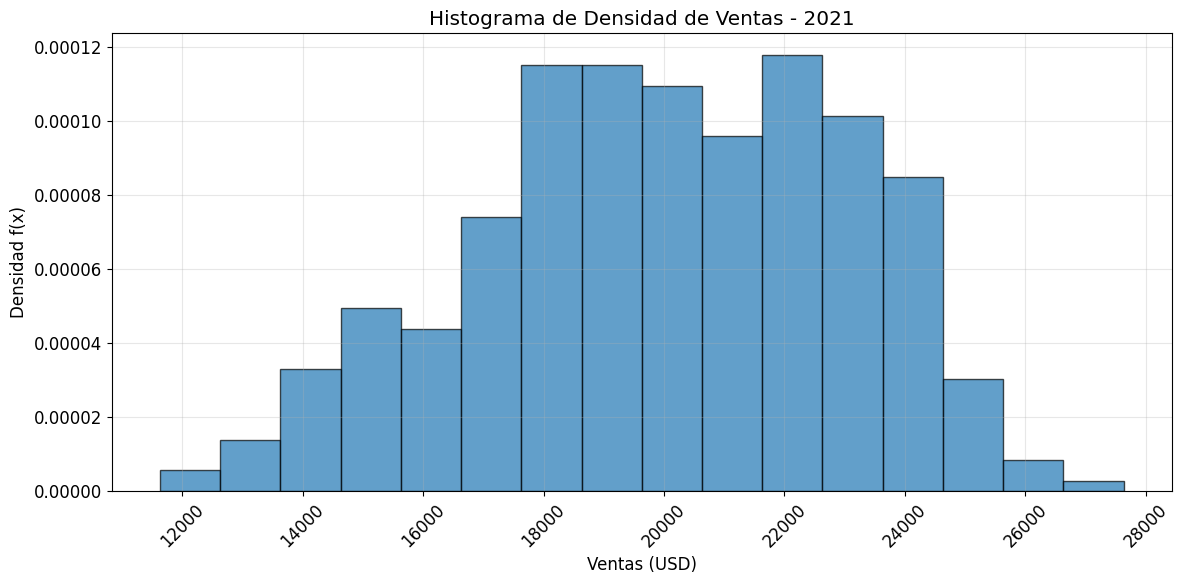

In [9]:
# Graficar histograma individual para 2021
graficar_histograma(f_x_2021, 'Histograma de Densidad de Ventas - 2021')

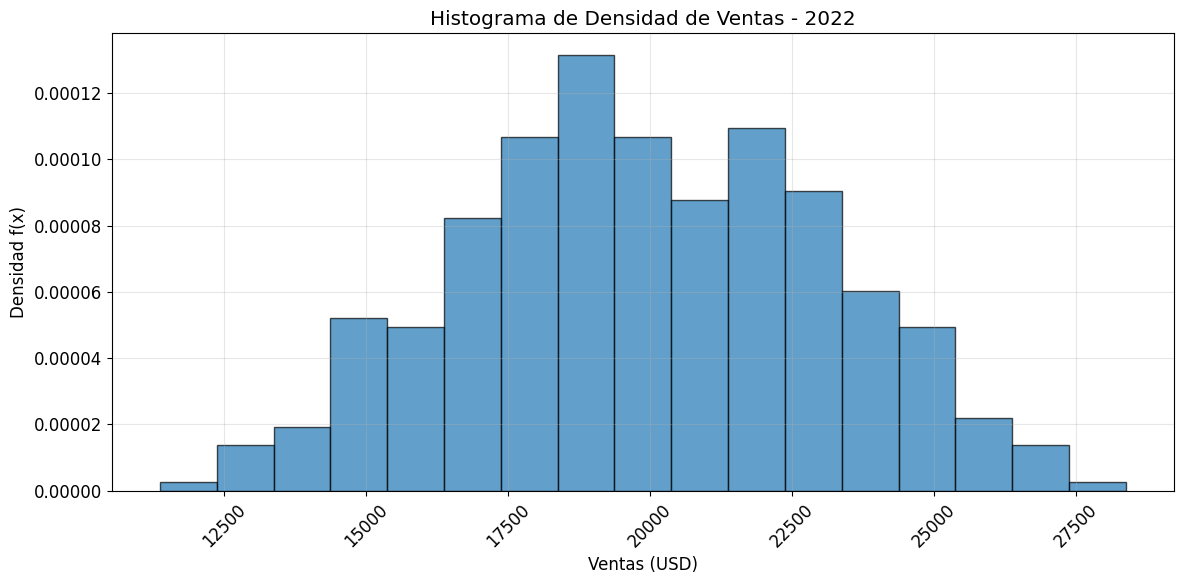

In [10]:
# Graficar histograma individual para 2022
graficar_histograma(f_x_2022, 'Histograma de Densidad de Ventas - 2022')

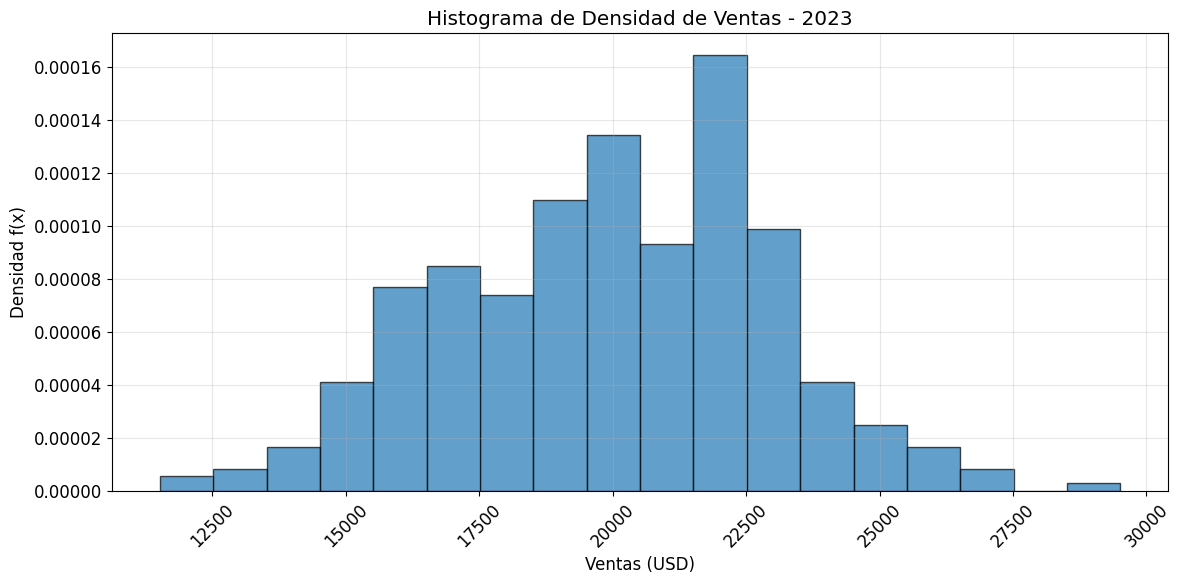

In [11]:
# Graficar histograma individual para 2023
graficar_histograma(f_x_2023, 'Histograma de Densidad de Ventas - 2023')


In [12]:
# Mostrar los valores numéricos de los histogramas
print("=== HISTOGRAMA 2021 ===")
for intervalo, densidad in str_f_x_2021.items():
    print(f"{intervalo}: {densidad:.6f}")

print("\n=== HISTOGRAMA 2022 ===")
for intervalo, densidad in str_f_x_2022.items():
    print(f"{intervalo}: {densidad:.6f}")

print("\n=== HISTOGRAMA 2023 ===")
for intervalo, densidad in str_f_x_2023.items():
    print(f"{intervalo}: {densidad:.6f}")


=== HISTOGRAMA 2021 ===
1(11631.036909787314 <= x < 12631.036909787314): 0.000005
1(12631.036909787314 <= x < 13631.036909787314): 0.000014
1(13631.036909787314 <= x < 14631.036909787314): 0.000033
1(14631.036909787314 <= x < 15631.036909787314): 0.000049
1(15631.036909787314 <= x < 16631.03690978731): 0.000044
1(16631.03690978731 <= x < 17631.03690978731): 0.000074
1(17631.03690978731 <= x < 18631.03690978731): 0.000115
1(18631.03690978731 <= x < 19631.03690978731): 0.000115
1(19631.03690978731 <= x < 20631.03690978731): 0.000110
1(20631.03690978731 <= x < 21631.03690978731): 0.000096
1(21631.03690978731 <= x < 22631.03690978731): 0.000118
1(22631.03690978731 <= x < 23631.03690978731): 0.000101
1(23631.03690978731 <= x < 24631.03690978731): 0.000085
1(24631.03690978731 <= x < 25631.03690978731): 0.000030
1(25631.03690978731 <= x < 26631.03690978731): 0.000008
1(26631.03690978731 <= x < 27631.03690978731): 0.000003

=== HISTOGRAMA 2022 ===
1(11373.58741154853 <= x < 12373.58741154853):

### **Análisis de los Histogramas de Densidad**

Los histogramas revelan patrones importantes en la distribución de ventas:

#### **Implicaciones para Don Francisco:**
1. **Predictibilidad**: Las ventas siguen patrones consistentes año tras año
2. **Rango típico**: La mayoría de días las ventas están entre $15,000-25,000 USD
3. **Estabilidad del negocio**: La consistencia en las distribuciones sugiere un negocio estable


# Cálculo de la función empírica de distribución

La Función empírica es una estimación de la función de distribución acumulada de una variable aleatoria.
La función de distribución empírica se define como:

$$\hat{F}(x) = \frac{1}{n} \sum_{i=1}^{n} \mathbf{1}(x_i \leq x)$$

Donde $x_1, x_2, \ldots, x_n$ se asumen realizaciones de las variables aleatorias $X_1, X_2, \ldots, X_n$, todas con distribución $F_X(x)$ e independientes.

### Componentes:

- **$\hat{F}(x)$**: Función de distribución empírica en el punto $x$
- **$\frac{1}{n}$**: Factor de normalización, donde $n$ es el número total de observaciones
- **$\sum_{i=1}^{n}$**: Suma sobre todas las observaciones desde $i=1$ hasta $i=n$
- **$\mathbf{1}(x_i \leq x)$**: Función indicadora que vale:
  - $1$ si la observación $x_i$ es menor o igual que $x$
  - $0$ en caso contrario
- **$x_1, x_2, \ldots, x_n$**: Realizaciones observadas de las variables aleatorias
- **$X_1, X_2, \ldots, X_n$**: Variables aleatorias independientes e idénticamente distribuidas
- **$F_X(x)$**: Función de distribución teórica común a todas las variables aleatorias

### Interpretación:

La función de distribución empírica $\hat{F}(x)$ estima la probabilidad de que una variable aleatoria sea menor o igual que $x$, contando la proporción de observaciones en la muestra que son menores o iguales a $x$.

In [13]:
def func_empirica(df, ancho_del_bin=H_ANCHO_DEL_BIN):
    min_value = df['Ventas'].min()
    max_value = df['Ventas'].max()
    bins = ceil((max_value - min_value) / ancho_del_bin)

    str_F_x = {}
    F_x = {}
    for i in range(bins):
        min_bin_value = min_value + i * ancho_del_bin
        max_bin_value = min_value + (i + 1) * ancho_del_bin
        area_name = f"1({min_bin_value} <= x < {max_bin_value})"

        bin_total = df[df['Ventas'] < max_bin_value]['Ventas'].count()
        bin_probability = bin_total / len(df)
        str_F_x[area_name] = bin_probability
        F_x[(min_bin_value, max_bin_value)] = bin_probability

    return str_F_x, F_x

def graficar_func_empirica(F_x, titulo='Función de Distribución Empírica'):
    # Extraer los valores mínimos de los bins (inicio de cada barra) y las probabilidades
    bin_starts = []
    probabilities = []

    for (min_val, max_val), freq in F_x.items():
        bin_starts.append(min_val)
        probabilities.append(freq)
    
    plt.figure(figsize=(12, 6))
    # Usar align='edge' para que la barra comience exactamente en min_val
    # y width=H_ANCHO_DEL_BIN para que cubra todo el intervalo
    plt.bar(bin_starts, probabilities, width=H_ANCHO_DEL_BIN, 
             alpha=0.7, edgecolor='black', align='edge')
    plt.title(titulo)
    plt.xlabel('Ventas (USD)')
    plt.ylabel('Probabilidad F(x)')
    plt.grid(True, alpha=0.3)
    
    # Formatear los valores del eje x para que sean más legibles
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='x')
    
    plt.tight_layout()
    plt.show()

In [14]:
# Calcular función de distribución empírica para los tres años
str_F_x_2021, F_x_2021 = func_empirica(df_2021)
str_F_x_2022, F_x_2022 = func_empirica(df_2022)
str_F_x_2023, F_x_2023 = func_empirica(df_2023)

print("✅ Función de distribución empírica calculada para los tres años")

✅ Función de distribución empírica calculada para los tres años


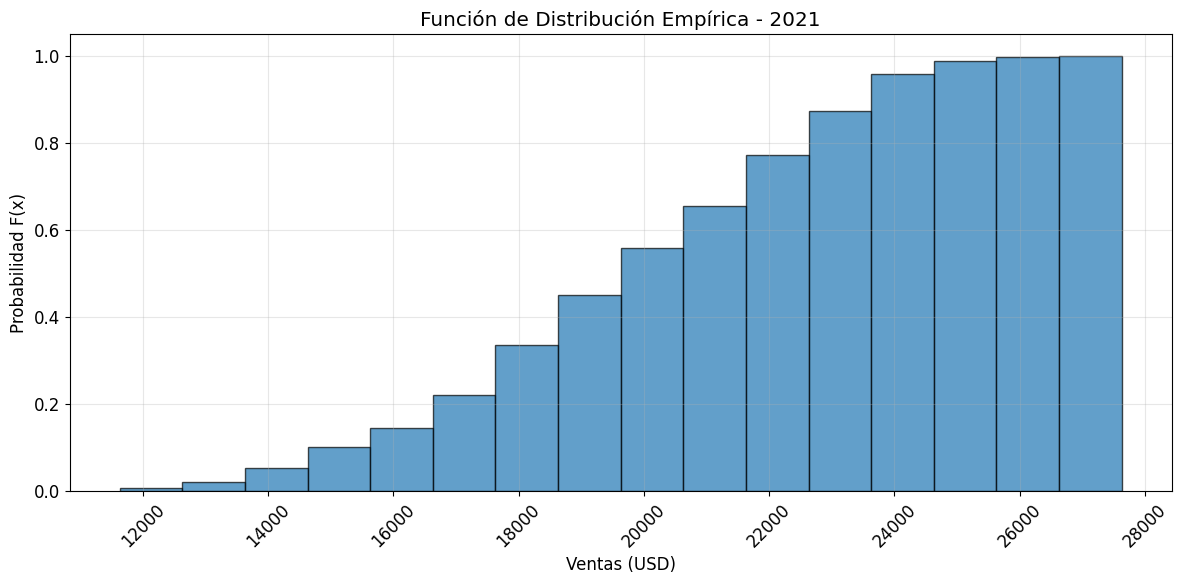

In [15]:
graficar_func_empirica(F_x_2021, 'Función de Distribución Empírica - 2021')

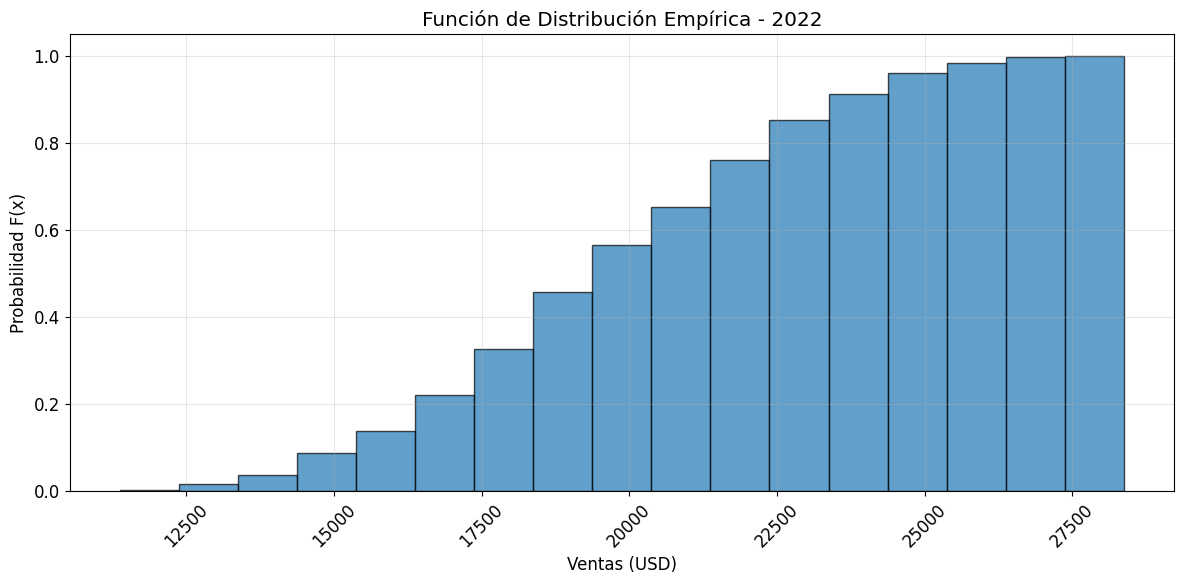

In [16]:
graficar_func_empirica(F_x_2022, 'Función de Distribución Empírica - 2022')

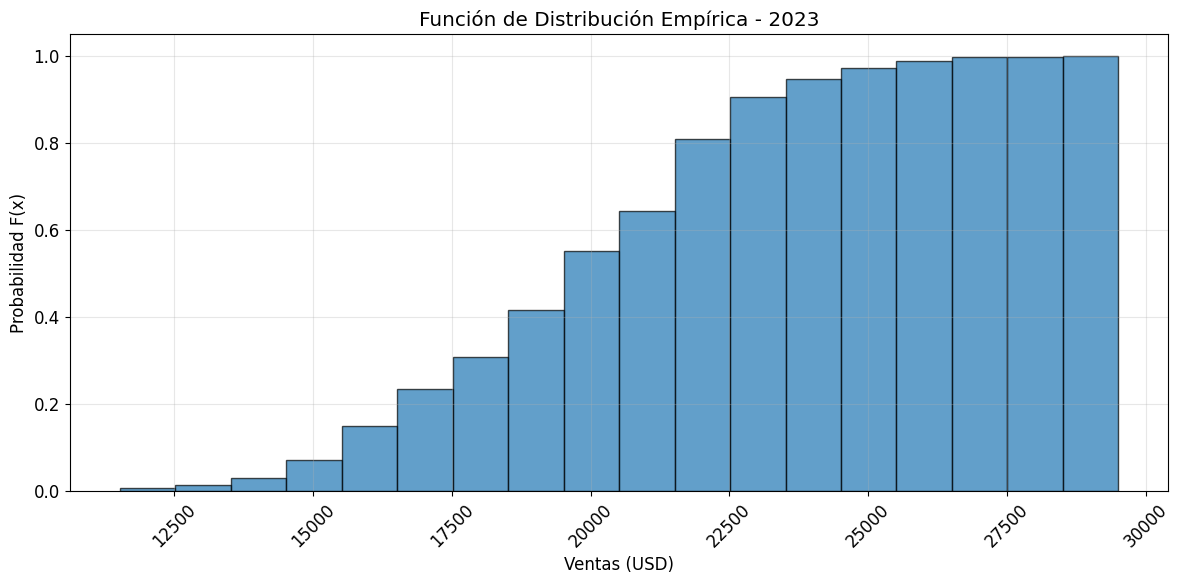

In [17]:
graficar_func_empirica(F_x_2023, 'Función de Distribución Empírica - 2023')

In [18]:
# Mostrar los valores numéricos de las funciones de distribución empírica
print("=== FUNCIÓN DE DISTRIBUCIÓN EMPÍRICA 2021 ===")
for intervalo, probabilidad in str_F_x_2021.items():
    print(f"{intervalo}: {probabilidad:.6f}")

print("\n=== FUNCIÓN DE DISTRIBUCIÓN EMPÍRICA 2022 ===")
for intervalo, probabilidad in str_F_x_2022.items():
    print(f"{intervalo}: {probabilidad:.6f}")

print("\n=== FUNCIÓN DE DISTRIBUCIÓN EMPÍRICA 2023 ===")
for intervalo, probabilidad in str_F_x_2023.items():
    print(f"{intervalo}: {probabilidad:.6f}")

=== FUNCIÓN DE DISTRIBUCIÓN EMPÍRICA 2021 ===
1(11631.036909787314 <= x < 12631.036909787314): 0.005479
1(12631.036909787314 <= x < 13631.036909787314): 0.019178
1(13631.036909787314 <= x < 14631.036909787314): 0.052055
1(14631.036909787314 <= x < 15631.036909787314): 0.101370
1(15631.036909787314 <= x < 16631.03690978731): 0.145205
1(16631.03690978731 <= x < 17631.03690978731): 0.219178
1(17631.03690978731 <= x < 18631.03690978731): 0.334247
1(18631.03690978731 <= x < 19631.03690978731): 0.449315
1(19631.03690978731 <= x < 20631.03690978731): 0.558904
1(20631.03690978731 <= x < 21631.03690978731): 0.654795
1(21631.03690978731 <= x < 22631.03690978731): 0.772603
1(22631.03690978731 <= x < 23631.03690978731): 0.873973
1(23631.03690978731 <= x < 24631.03690978731): 0.958904
1(24631.03690978731 <= x < 25631.03690978731): 0.989041
1(25631.03690978731 <= x < 26631.03690978731): 0.997260
1(26631.03690978731 <= x < 27631.03690978731): 1.000000

=== FUNCIÓN DE DISTRIBUCIÓN EMPÍRICA 2022 ===
1(

### **Interpretación Básica de Resultados Empíricos**

Los valores numéricos mostrados arriba representan las probabilidades acumuladas para cada intervalo de ventas.
